Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 



In [120]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Loading dataset

In [121]:
df=pd.read_csv("customer_churn.csv")

In [122]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The dataset has 7043 rows and 21 columns

In [123]:
df.keys

<bound method NDFrame.keys of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [124]:
df.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The given dataset has 21 columns

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [126]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The datatype is an object type

In [127]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null value in given dataset

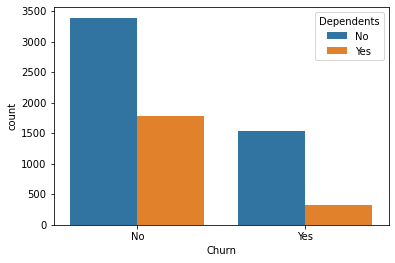

In [128]:
sns.countplot(data=df,x='Churn',hue='Dependents')

In [129]:
cat_col = [x for x in df.columns if df[x].dtype == "object" and x != "customerID"]
num_col = [x for x in df.columns if df[x].dtype != "object"]

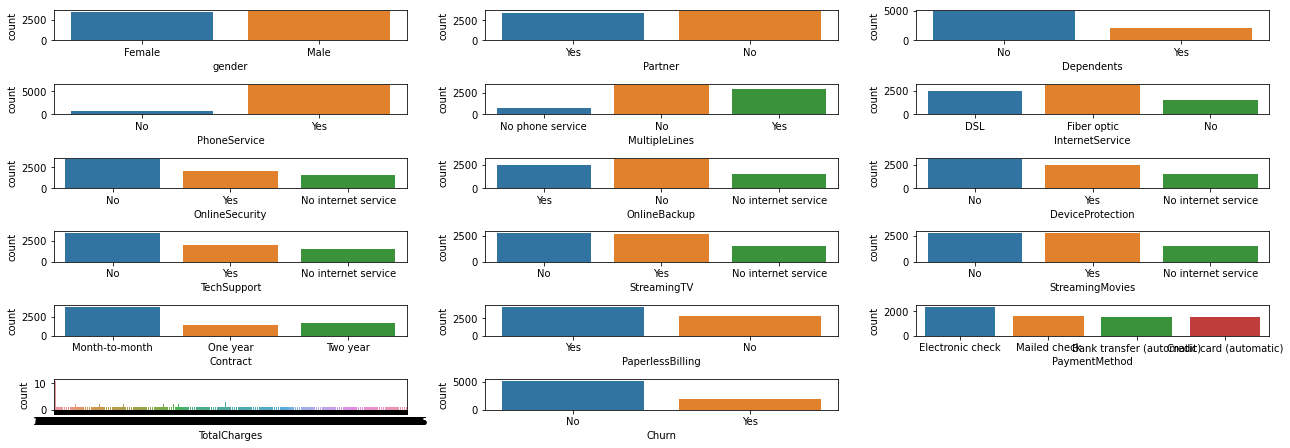

In [130]:
fig =plt.figure(figsize=(18, 10))
for i, col in enumerate (cat_col):
    plt.subplot(10, 3, i+1)
    sns.countplot(x=df[col])
    plt.tight_layout()
fig.show()

The dataset has the dequal no of male and female member.
Half of the customer have partners.
The number of dependents is less than independents.
Majority of members dhave phone services.
The no of members is higher in Fiber optic internet Services and prefer the paperless billing,electronic check and have one year contract.


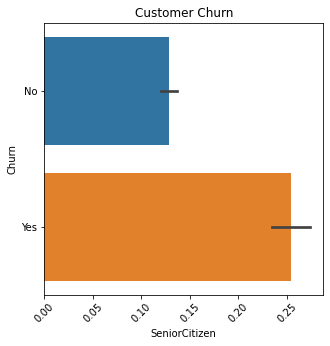

In [131]:
plt.figure(figsize=(5,5))
sns.barplot(x='SeniorCitizen',y='Churn',data=df)
plt.title("Customer Churn")
plt.xticks(rotation=45)
plt.show()

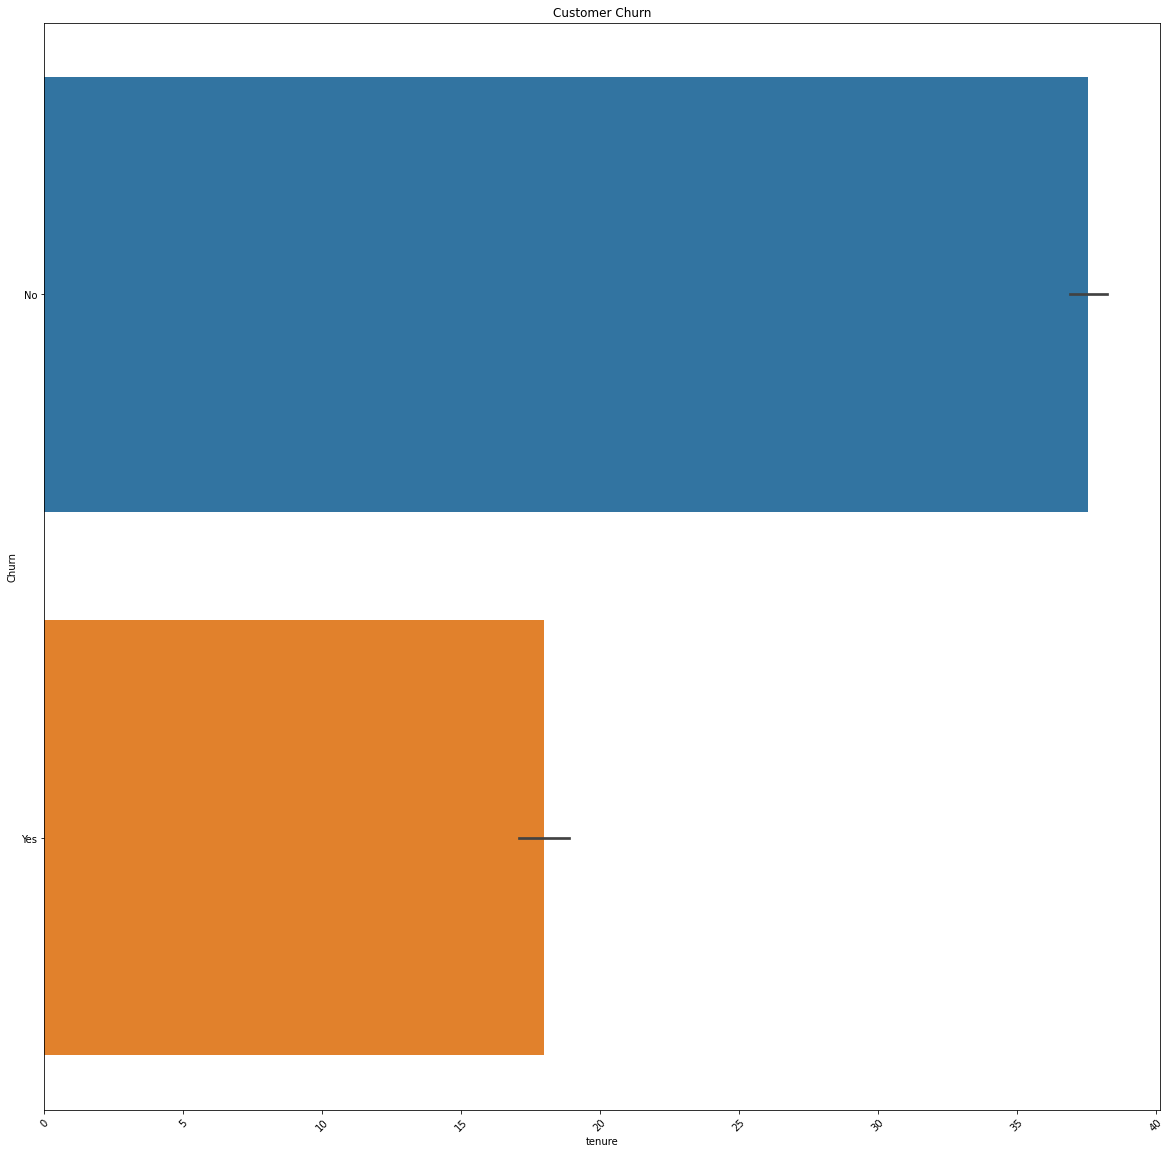

In [132]:
plt.figure(figsize=(20,20))
sns.barplot(x='tenure',y='Churn',data=df)
plt.title("Customer Churn")
plt.xticks(rotation=45)
plt.show()

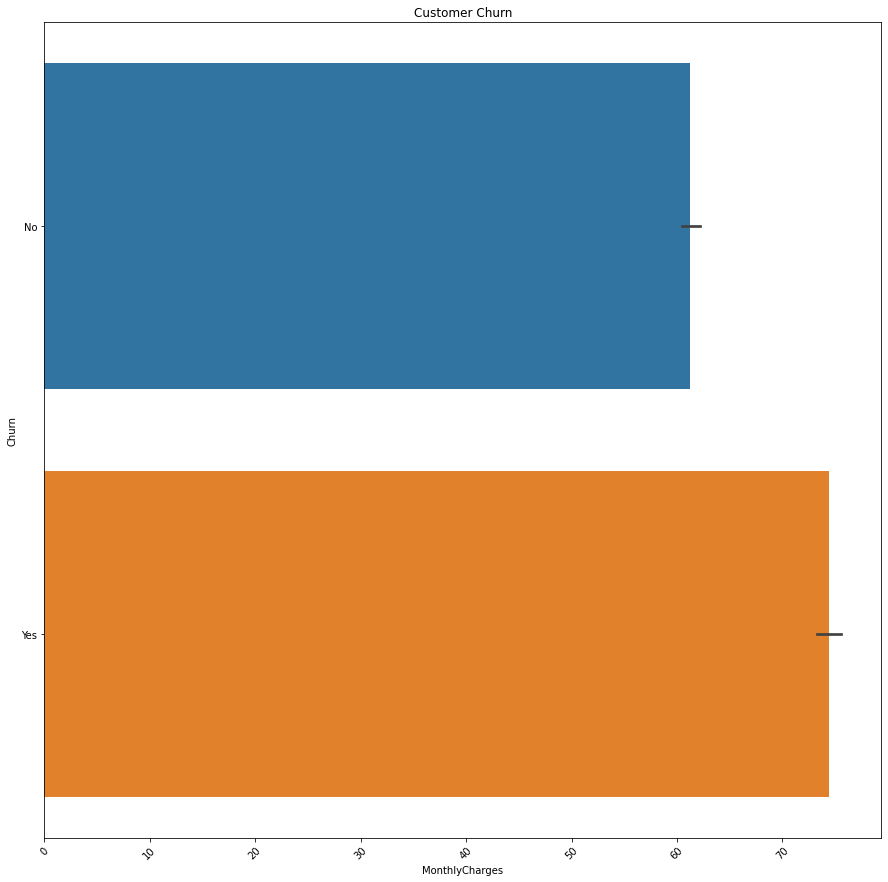

In [133]:
plt.figure(figsize=(15,15))
sns.barplot(x='MonthlyCharges',y='Churn',data=df)
plt.title("Customer Churn")
plt.xticks(rotation=45)
plt.show()

The dataset shows that where monthly charges on higher side customer churn the services.
Customer stick with higher tenure.


In [134]:
from sklearn.preprocessing import LabelEncoder #Converting catagorical data into numerical
LE=LabelEncoder()

df["customerID"]=LE.fit_transform(df["customerID"])
df["gender"]=LE.fit_transform(df["gender"])
df["Partner"]=LE.fit_transform(df["Partner"])
df["Dependents"]=LE.fit_transform(df["Dependents"])
df["PhoneService"]=LE.fit_transform(df["PhoneService"])
df["MultipleLines"]=LE.fit_transform(df["MultipleLines"])
df["InternetService"]=LE.fit_transform(df["InternetService"])
df["OnlineSecurity"]=LE.fit_transform(df["OnlineSecurity"])
df["OnlineBackup"]=LE.fit_transform(df["OnlineBackup"])
df["DeviceProtection"]=LE.fit_transform(df["DeviceProtection"])
df["TechSupport"]=LE.fit_transform(df["TechSupport"])
df["StreamingTV"]=LE.fit_transform(df["StreamingTV"])
df["Contract"]=LE.fit_transform(df["Contract"])
df["PaperlessBilling"]=LE.fit_transform(df["PaperlessBilling"])
df["PaymentMethod"]=LE.fit_transform(df["PaymentMethod"])
df["TotalCharges"]=LE.fit_transform(df["TotalCharges"])
df["Churn"]=LE.fit_transform(df["Churn"])
df["StreamingMovies"]=LE.fit_transform(df["StreamingMovies"])

In [135]:
dfcor=df.corr() #Checking Correlation
dfcor

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


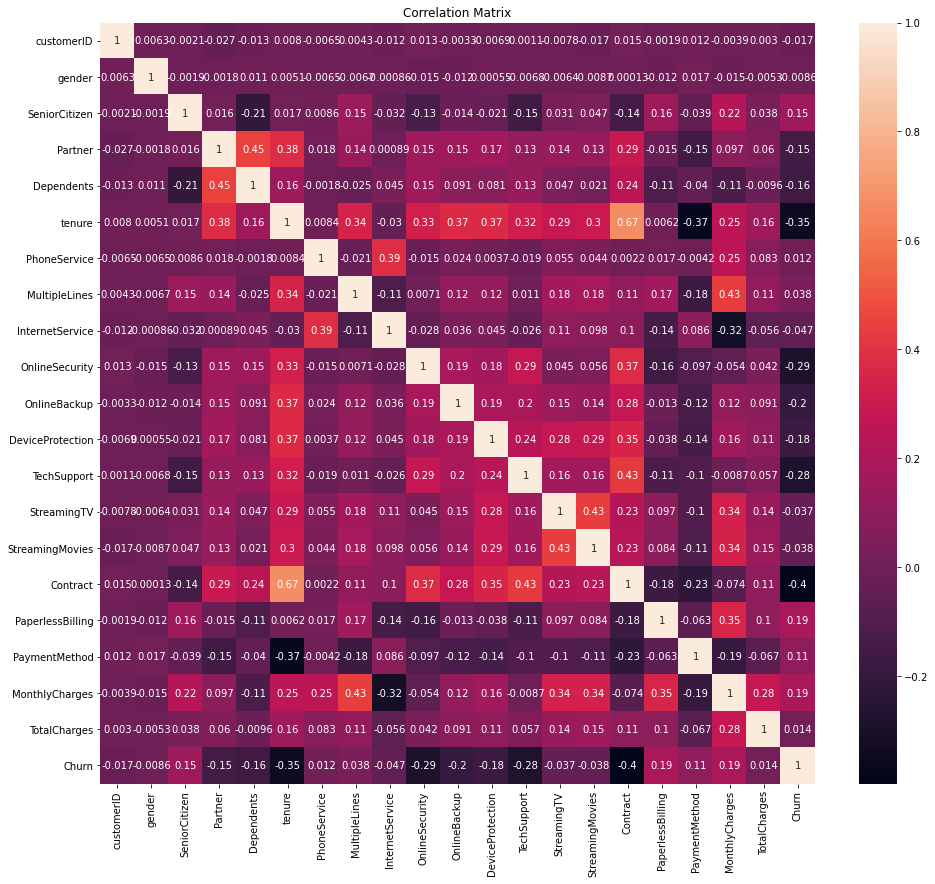

In [136]:
plt.figure(figsize=(16,14))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

There is very moderate positive and negative correlation among independent variable with target variable

In [137]:
corr_matrix=df.corr()

In [138]:
corr_matrix["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

customerID             AxesSubplot(0.125,0.772143;0.168478x0.107857)
gender              AxesSubplot(0.327174,0.772143;0.168478x0.107857)
SeniorCitizen       AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Partner             AxesSubplot(0.731522,0.772143;0.168478x0.107857)
Dependents             AxesSubplot(0.125,0.642714;0.168478x0.107857)
tenure              AxesSubplot(0.327174,0.642714;0.168478x0.107857)
PhoneService        AxesSubplot(0.529348,0.642714;0.168478x0.107857)
MultipleLines       AxesSubplot(0.731522,0.642714;0.168478x0.107857)
InternetService        AxesSubplot(0.125,0.513286;0.168478x0.107857)
OnlineSecurity      AxesSubplot(0.327174,0.513286;0.168478x0.107857)
OnlineBackup        AxesSubplot(0.529348,0.513286;0.168478x0.107857)
DeviceProtection    AxesSubplot(0.731522,0.513286;0.168478x0.107857)
TechSupport            AxesSubplot(0.125,0.383857;0.168478x0.107857)
StreamingTV         AxesSubplot(0.327174,0.383857;0.168478x0.107857)
StreamingMovies     AxesSubplot(0.

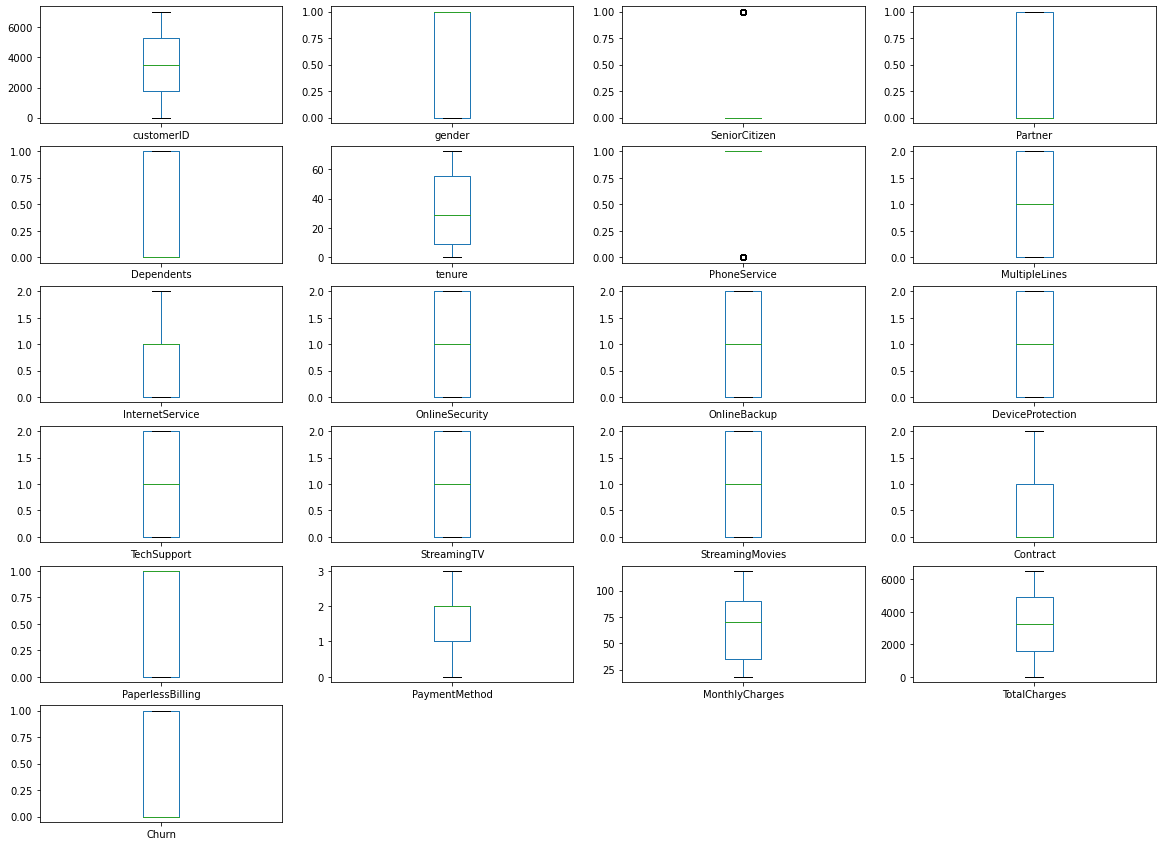

In [139]:
df.plot(kind='box',subplots=True, layout=(6,4), figsize= (20,15)) #Checking outliers

There is no outliers in given datatset

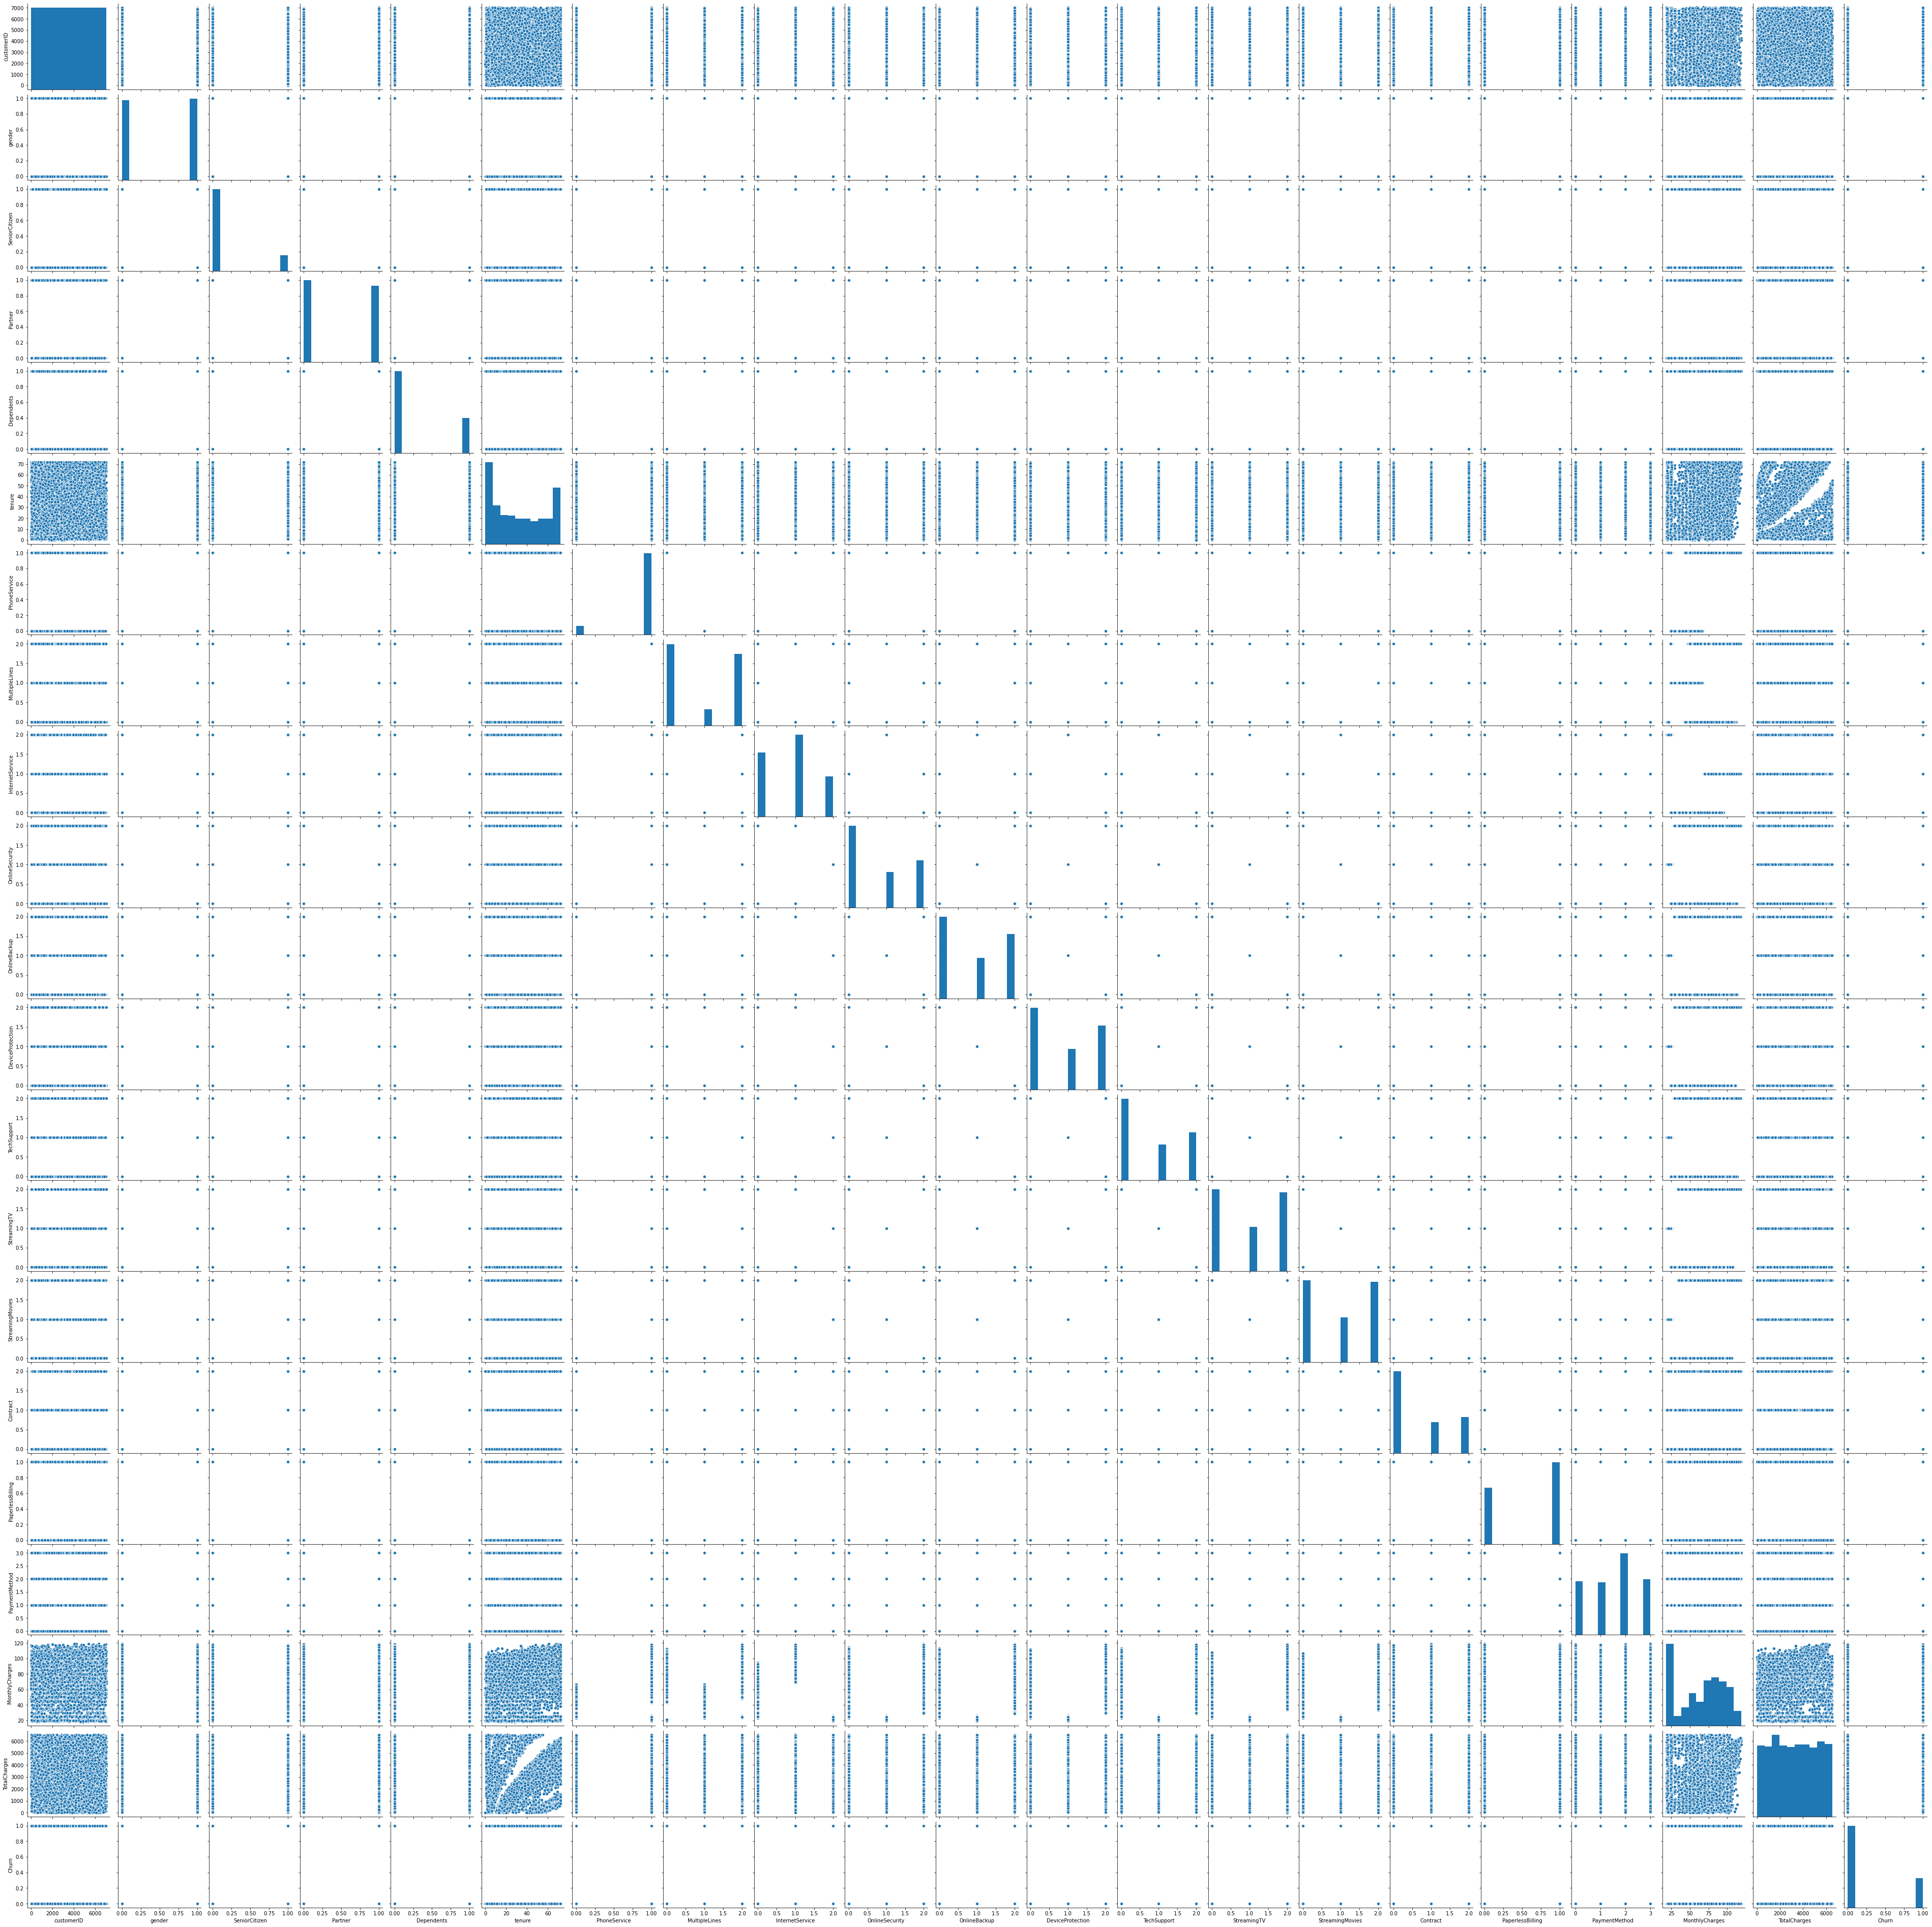

In [140]:
sns.pairplot(df) #Checking Skewness
plt.show()

In [141]:
df.skew() # Checking Skewness

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

We are going with skewness as our data type is object.

In [ ]:
x=df.drop("Churn",axis=1) #Spliting target variable
y=df["Churn"]

In [ ]:
from sklearn.preprocessing import StandardScaler #Scalling data with StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

Testing,training, validating and hypertuning the model

In [ ]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=48)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
predlr=dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predlr=svc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predlr=rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Validating model with cross val score

In [ ]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x,y,cv=5)
print("Cross validation of LogisticRegression model:",scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x,y,cv=5)
print("Cross validation of DecisionTree model:",scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x,y,cv=5)
print("Cross validation of SVC model:",scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x,y,cv=5)
print("Cross validation of RandomForest model:",scr.mean())

Minimum difference in accuracy and cross validation score is for DecissionTreeClassifier so this is our best model

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
y_pred_prob=dt.predict_proba(x_test)[:,1]

In [ ]:
y_pred_prob

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecissionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecissionTreeClassifier')
plt.show()

In [ ]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))

In [ ]:
print(auc_score)

Hyper tunning dataset with the help of GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Creating parameter list to pass in GridSearch

parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [ ]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_ #Printing the best parameter found by GridSearch

In [ ]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [ ]:
accuracy_score(y_test,GCV_pred)

Our accuracy is 93% after hyper tunning of our moder

In [ ]:
import joblib #Saving Model
joblib.dump(dt,"customer_churn.csv.obj")


In [ ]:
p=joblib.load("customer_churn.csv.obj")

In [ ]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dt.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [ ]:
df_com